In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
Q1=df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

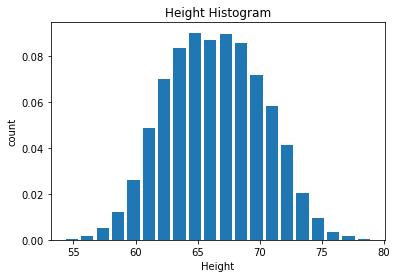

In [5]:
plt.hist(df["Height"],bins=20,rwidth=0.8,density=True)
plt.title("Height Histogram")
plt.xlabel("Height")
plt.ylabel("count")
plt.show()

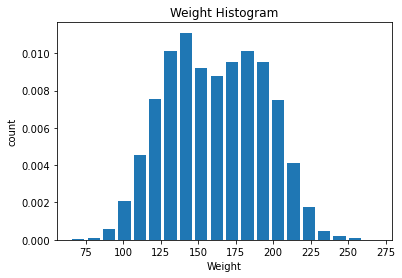

In [6]:
plt.hist(df["Weight"],bins=20,rwidth=0.8,density=True)
plt.title("Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("count")
plt.show()

In [7]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [8]:
Q1=df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1,Q3

(135.8180513055015, 187.16952486868348)

In [9]:
IQR = Q3 -Q1
IQR

51.35147356318197

In [10]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(58.79084096072856, 264.19673521345646)

In [11]:
df[(df.Weight < lower_limit) | (df.Weight > upper_limit) ]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [12]:
df1 = df[(df.Weight > lower_limit) & (df.Weight < upper_limit) ]
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
Q1=df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [14]:
IQR = Q3 -Q1
IQR

5.668641245615746

In [15]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(55.00265861279534, 77.67722359525831)

In [16]:
df[(df.Height < lower_limit) | (df.Height > upper_limit) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [17]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [18]:
df2 = df[(df.Height > lower_limit) & (df.Height < upper_limit)]
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9992 non-null   object 
 1   Height  9992 non-null   float64
 2   Weight  9992 non-null   float64
dtypes: float64(2), object(1)
memory usage: 312.2+ KB


In [20]:
df.shape[0] - df2.shape[0]

8

In [21]:
dummies = pd.get_dummies(df2["Gender"],drop_first=True)
dummies

,Male
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [29]:
df3 = pd.concat([df2,dummies],axis=1)

In [30]:
df3.head()

,Gender,Height,Weight,Male
0,Male,73.847017,241.893563,1
1,Male,68.781904,162.310473,1
2,Male,74.110105,212.740856,1
3,Male,71.730978,220.042470,1
4,Male,69.881796,206.349801,1


In [31]:
df3.drop("Gender",axis=1,inplace=True)

In [32]:
df3

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [33]:
df3.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


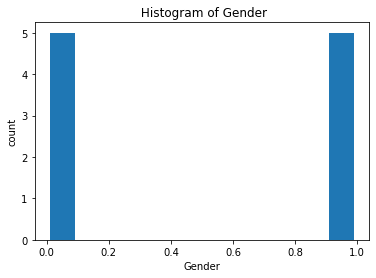

In [35]:
plt.hist(df3["Male"],rwidth = 0.8,density=True)
plt.title(" Histogram of Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

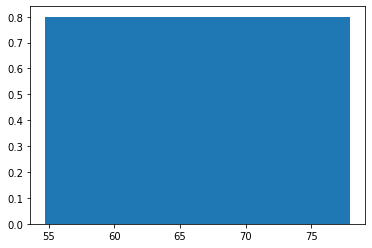

In [36]:
plt.bar(df3["Height"],height=0.8)
plt.show()

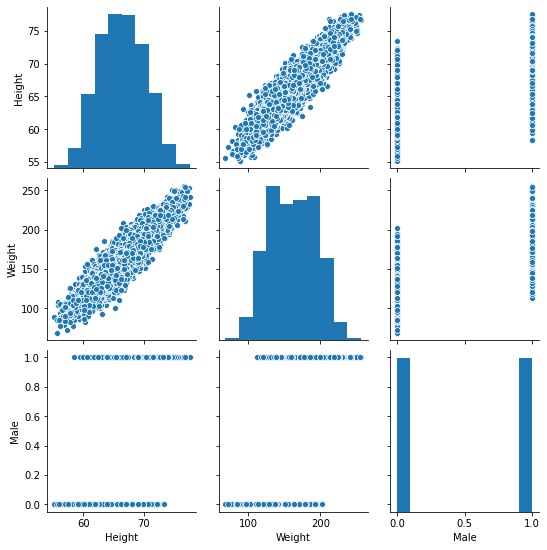

In [37]:
import seaborn as sns
sns.pairplot(df3)
plt.show()

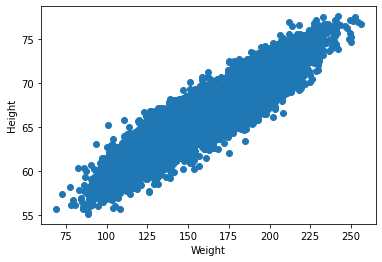

In [38]:
plt.scatter(df3["Weight"],df3["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

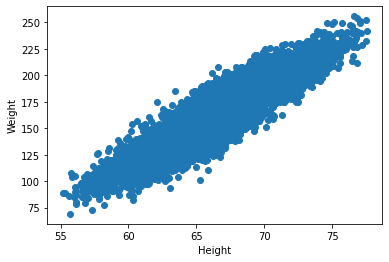

In [39]:
plt.scatter(df3["Height"],df3["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [41]:
x= df3.drop("Height",axis=1)
y = df3["Height"]

In [47]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [51]:
x_test

,Weight,Male
7479,158.285460,0
7407,137.975016,0
9696,103.323656,0
799,160.050285,1
9864,131.188148,0
...,...,...
1109,197.639550,1
3330,200.507356,1
2965,200.242479,1
700,187.812062,1


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = model.predict(x_test)

In [49]:
y_pred

array([66.45878089, 63.96242922, 59.70343906, ..., 70.65310206,
       69.12528256, 70.85272838])

In [54]:
model.predict([[158.285460,0]])

array([66.45878095])

In [63]:
data ={"y_test": y_test, "y_pred" : y_pred}

In [64]:
df4 = pd.DataFrame(data)

In [65]:
df4

,y_test,y_pred
7479,62.724725,66.458781
7407,63.336850,63.962429
9696,61.569316,59.703439
799,67.110447,65.713089
9864,59.874501,63.128257
...,...,...
1109,69.731013,70.333177
3330,72.761711,70.685658
2965,69.508182,70.653102
700,69.760095,69.125283


In [66]:
model.score(x_test,y_test)

0.8627617856123126